In [48]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import os


In [49]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [50]:
import psutil

process = psutil.Process(os.getpid())
print('Memory usage at start: {:.2f} GB'.format(process.memory_info().rss / 1e9))


Memory usage at start: 1.42 GB


In [51]:
import imghdr
import cv2

In [52]:
data_dir = "data"
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [53]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\10563227-happy-person.jpg
Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\5b9e7d542100003100c5f33e.jpeg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\happy-people-group-fb.jpg
Image not in ext list data\happy\happy-smiling-man-standing-closed-260nw-2217623309.jpg


In [54]:
data = tf.keras.utils.image_dataset_from_directory("data/")

Found 216 files belonging to 2 classes.


In [55]:
data_iterator =data.as_numpy_iterator()

In [56]:
batch = data_iterator.next()

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

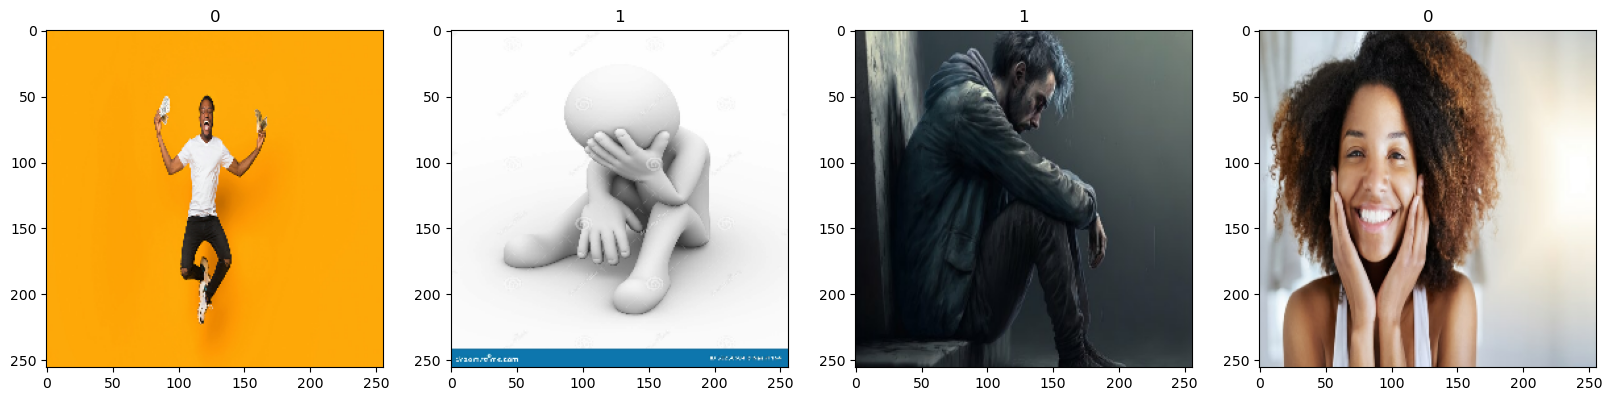

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [58]:
data = data.map(lambda x,y: (x/255, y))

In [59]:

data.as_numpy_iterator().next()

(array([[[[0.7019608 , 0.79607844, 0.8117647 ],
          [0.7019608 , 0.79607844, 0.8117647 ],
          [0.7019608 , 0.79607844, 0.8117647 ],
          ...,
          [0.73333335, 0.8039216 , 0.81960785],
          [0.73333335, 0.8039216 , 0.81960785],
          [0.73333335, 0.8039216 , 0.81960785]],
 
         [[0.7019608 , 0.79607844, 0.8117647 ],
          [0.7019608 , 0.79607844, 0.8117647 ],
          [0.69803923, 0.7921569 , 0.80784315],
          ...,
          [0.73333335, 0.8039216 , 0.81960785],
          [0.73333335, 0.8039216 , 0.81960785],
          [0.73333335, 0.8039216 , 0.81960785]],
 
         [[0.7019608 , 0.79607844, 0.8117647 ],
          [0.7019608 , 0.79607844, 0.8117647 ],
          [0.694366  , 0.7884836 , 0.8041699 ],
          ...,
          [0.73333335, 0.8039216 , 0.81960785],
          [0.73333335, 0.8039216 , 0.81960785],
          [0.73333335, 0.8039216 , 0.81960785]],
 
         ...,
 
         [[0.12222733, 0.09024622, 0.10844822],
          [0.19511

In [60]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [61]:
print(train_size)

4


In [62]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [64]:
model = Sequential()

In [65]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [68]:
logdir = "log"
callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [69]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=callback)

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 0.7119 - accuracy: 0.6016 - val_loss: 0.5925 - val_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 5s 900ms/step - loss: 0.6097 - accuracy: 0.7109 - val_loss: 0.5877 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 5s 906ms/step - loss: 0.5873 - accuracy: 0.6797 - val_loss: 0.4516 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 5s 963ms/step - loss: 0.4787 - accuracy: 0.7891 - val_loss: 0.5966 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 5s 940ms/step - loss: 0.4938 - accuracy: 0.7344 - val_loss: 0.5402 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 5s 923ms/step - loss: 0.5237 - accuracy: 0.7266 - val_loss: 0.4966 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 5s 993ms/step - loss: 0.5073 - accuracy: 0.7266 - val_loss: 0.5815 - val_accuracy: 0.7188
Epoch 8/20
4/4 [=======

In [70]:
hist.history

{'loss': [0.7118715643882751,
  0.6096547245979309,
  0.587270975112915,
  0.47871172428131104,
  0.4938336908817291,
  0.5236741304397583,
  0.5072818994522095,
  0.4486050009727478,
  0.4086291193962097,
  0.3275569677352905,
  0.28906112909317017,
  0.24439269304275513,
  0.2716866731643677,
  0.1742369681596756,
  0.20338790118694305,
  0.13274215161800385,
  0.10211548209190369,
  0.08331682533025742,
  0.0388285294175148,
  0.029386725276708603],
 'accuracy': [0.6015625,
  0.7109375,
  0.6796875,
  0.7890625,
  0.734375,
  0.7265625,
  0.7265625,
  0.78125,
  0.828125,
  0.8359375,
  0.8984375,
  0.8828125,
  0.8671875,
  0.984375,
  0.90625,
  0.9921875,
  0.984375,
  0.9921875,
  0.9921875,
  1.0],
 'val_loss': [0.5925453901290894,
  0.5876582860946655,
  0.4516288638114929,
  0.5965563654899597,
  0.5401859879493713,
  0.4965949058532715,
  0.5815009474754333,
  0.39858126640319824,
  0.20922362804412842,
  0.34375423192977905,
  0.31779223680496216,
  0.18036428093910217,
  0

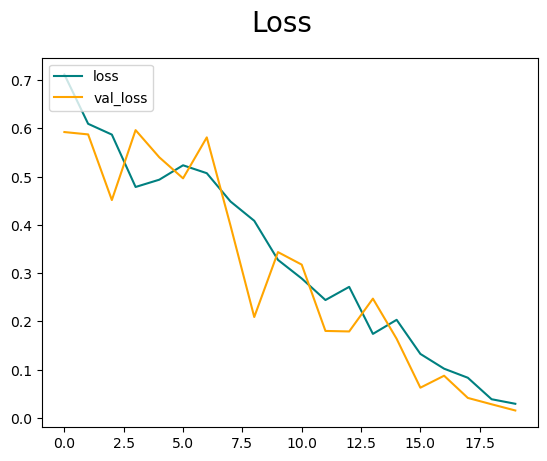

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

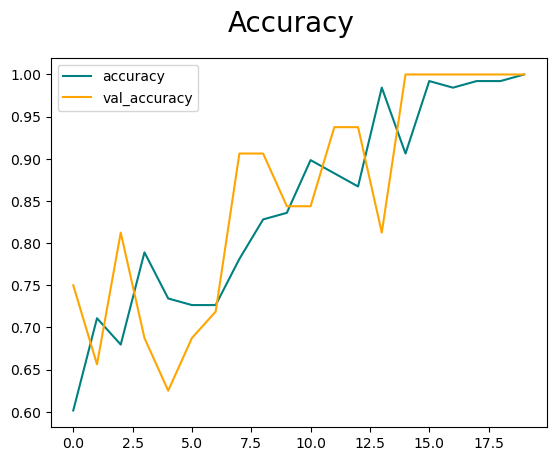

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [73]:
import cv2

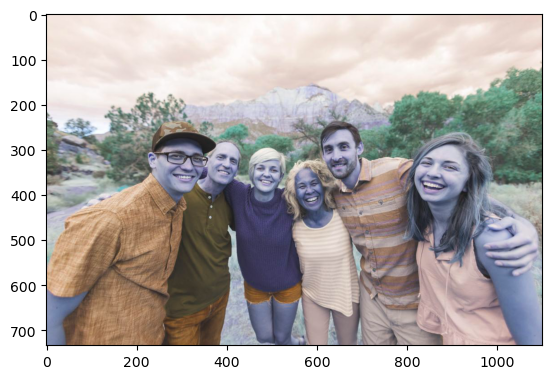

In [78]:
img = cv2.imread('group-of-happy-people.jpg')
plt.imshow(img)
plt.show()

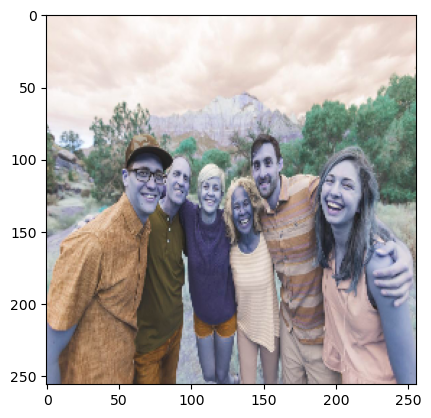

In [79]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 19ms/step


In [81]:
yhat

array([[0.42114973]], dtype=float32)

In [82]:
if yhat>0.5:
    print("Sad person")
else:
    print("Happy person")

Happy person


In [83]:
from tensorflow.keras.models import load_model

In [85]:
model.save(os.path.join('model','imageclassifier.h5'))

In [86]:
new_model = load_model(os.path.join('model','imageclassifier.h5'))

In [87]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 112ms/step


array([[0.42114973]], dtype=float32)